# The Effect of $ C_{inorg} $ on Calculation of $ C_{org} $

The depiction of organic carbon content of a sediment or soil as a percentage of total mass is a simple notion. We can envision a fraction of masses like: 

$$
 \% TOC = \frac{m_{C_{org}}}{m_{total}} \times 100

$$

Of course, dealing with percentages simply involves multiplying by 100, so, to simplify the maths, we can deal with this as a proportion:

$$
TOC = \frac{m_{C_{org}}}{m_{total}}
$$

The complication lies in the analysis and reporting of $TOC$ values. In order to measure just the *organic* portion of carbon in a sample, the inorganic portion must be chemically removed. We generally do this with treatment (washing or fumigation) in a (weak or strong) acid, generally $HCl$ or $ H_2SO_3 $. That means that reported values of TOC may not be reported with the true denominator, $m_{total}$ due to the removal of $C_{inorg}$. The reported values, rather, can be defined as follows:

$$
TOC_{EA} = \frac{m_{C_{org}}}{(m_{total}-m_{C_{inorg}})}
$$

So how do we correct the $TOC_{EA}$ to a true $TOC$? It is easier to work in reported values, which are generally proportions or percentages. We can divide all of the parts of the equation above by $m_{total}$ to simplify: 
$$
TOC_{EA} = \frac{\frac{m_{C_{org}}}{m_{total}}}{(\frac{m_{total}}{m_{total}}-\frac{m_{C_{inorg}}}{m_{total}})}
$$
$$
TOC_{EA} = \frac{TOC}{1-TIC}
$$
where TIC (total inorganic carbon) is defined as
$$
TIC = \frac{m_{C_{inorg}}}{m_{total}}
$$

Below is a simple depiction of the difference between the two values over different $ \%C_{inorg} $ values:






In [12]:
#Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Develop simple function:
def plot_diff(TOC, inorg_range=(0,50)):
    '''
    Input variables:
        TOC (float): the percentage of organic matter by mass in a sample
        inorg_range (kwarg, tuple of two floats): the percentage of inorganic carbon in a sample, default=(0,99)
    '''

    #Make x-axis values:
    x = np.linspace(min(inorg_range), max(inorg_range), 50)

    #Calculate y-axis values:
    TOC_EA = [(TOC/100)/(1-(TIC/100))*100 for TIC in x]
    TOC_diff = [EA-TOC for EA in TOC_EA]

    #Plot x vs. y
    fig, ax = plt.subplots(nrows=2, ncols=1)
    ax[0].plot(x, TOC_EA, label=r'$\%TOC_{EA}$', color='grey', marker='', linewidth=4)
    #Add the true TOC:
    ax[0].hlines(TOC, min(x), max(x), color='lightgreen', label='Actual %TOC', linewidth=4)
    ax[0].legend()
    ax[0].set(ylabel='% Organic C')

    ax[1].plot(x, TOC_diff, color='lightblue', marker='', linewidth=4)
    ax[1].set(xlabel='% Inorganic C', ylabel='Difference $TOC_{EA}-TOC$')

    plt.tight_layout()

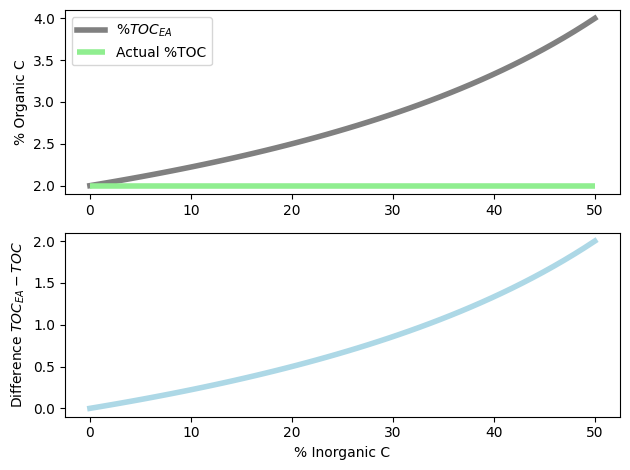

In [13]:
#Change the TOC value to something that is likely to be measured in your sample set:
TOC = 2
#Run the function from above to generate a plot. Remember that you can add a range of inorganic % C to the function
#if you want to plot over a different range than the default 0-50%. 
plot_diff(TOC)

## Correcting $TOC_{EA}$ to $TOC$

To correct values of $TOC_{EA}$ back to actual $TOC$ values, we simply need to employ the last equation from above, rearranged:


$$
TOC = TOC_{EA}\times(1-TIC)
$$

We can use this equation to view the effects of different amounts of $\%TIC$ on measurements of $TOC_{EA}$. 

In [16]:
#Create a plotting function
def plot_sensitivity_curves(OC_EA_range, inorg_range=(0,50)):
    '''
    Input variables:
        OC_EA_range (list): a list of values of reported OC_EA numbers, reported as percentages (0-100)
        inorg_range (kwark, tuple, default=(0-50)): the minimum and maximum C_inorg values, as percentages,
            that make up the x-axis of the plot
    '''
    #Make x-axis values:
    x = np.linspace(min(inorg_range), max(inorg_range), 50)

    #Create empty dictionary container for different lines
    output_dict = {}

    #Create loop for each input value of OC_EA_range:
    for oc in OC_EA_range:
        OC_true = [oc/100*(1-ic/100)*100 for ic in x]
        #Add to dictionary container:
        output_dict |= {oc:OC_true}

    #Plotting loop:
    fig, ax = plt.subplots(nrows=1, ncols=1)
    for k, v in output_dict.items():
        ax.plot(x, v, linewidth=2, label='$\%TOC_{EA}$ = '+str(k)+'%')
    ax.set(xlabel='% Inorganic C', ylabel='True %TOC')
    ax.legend()

    

<>:24: SyntaxWarning: "\%" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\%"? A raw string is also an option.
<>:24: SyntaxWarning: "\%" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\%"? A raw string is also an option.
C:\Users\beros\AppData\Local\Temp\ipykernel_29388\4023882105.py:24: SyntaxWarning: "\%" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\%"? A raw string is also an option.
  ax.plot(x, v, linewidth=2, label='$\%TOC_{EA}$ = '+str(k)+'%')


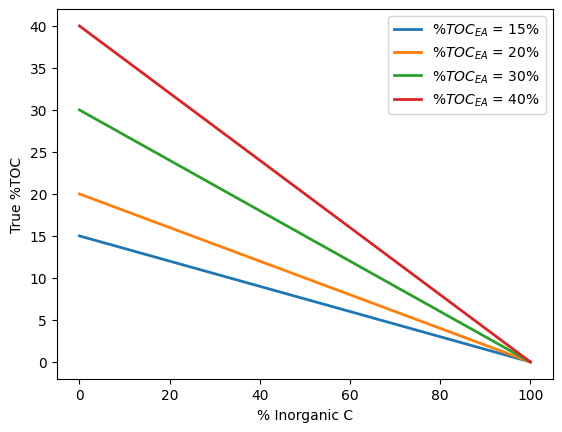

In [17]:
#Employ function above:

low_EA_vals = [0.1, 0.2, 0.5, 1]          #Change these values if you desire
high_EA_vals = [15, 20, 30, 40]

plot_sensitivity_curves(high_EA_vals, inorg_range=(0, 100))    #You can control the x-axis range by adding inorg_range=(min, max) where min
                                    #and max are percentages of inorganic carbon that bracket your samples